# Term Deposit Prediction by Elma F. Phiri

# Data collection and Preprocessing

Abstract: This project aims to predict whether a customer will subscribe to a term deposit based on a marketing campaign. By analyzing various customer features and applying predictive analytics, we can identify key factors influencing their decision.

Problem Statement:Predict if a customer subscribes to a term deposits or not, when contacted by a
marketing agent, by understanding the different features and performing predictive
analytics

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import ydata_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

In [2]:
#Data loading
bank = pd.read_csv("C:\\Users\\elmaf\\Desktop\\Portfolio projects\\Python\\Term Deposit Prediction\\bank_data.csv")
print(bank.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# Data Exploration

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
bank.shape

(41188, 21)

In [11]:
bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [12]:
bank.values

array([[56, 'housemaid', 'married', ..., 4.857, 5191.0, 'no'],
       [57, 'services', 'married', ..., 4.857, 5191.0, 'no'],
       [37, 'services', 'married', ..., 4.857, 5191.0, 'no'],
       ...,
       [56, 'retired', 'married', ..., 1.028, 4963.6, 'no'],
       [44, 'technician', 'married', ..., 1.028, 4963.6, 'yes'],
       [74, 'retired', 'married', ..., 1.028, 4963.6, 'no']], dtype=object)

In [50]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
bank.index

RangeIndex(start=0, stop=41188, step=1)

In [30]:
#Profile report
pp.ProfileReport(bank)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the profile report the following information is observed
We have duplicate rows
There are no missing values
Number of variables	21
Number of observations	41188
Missing cells	0
Missing cells (%)	0.0%
Duplicate rows	12

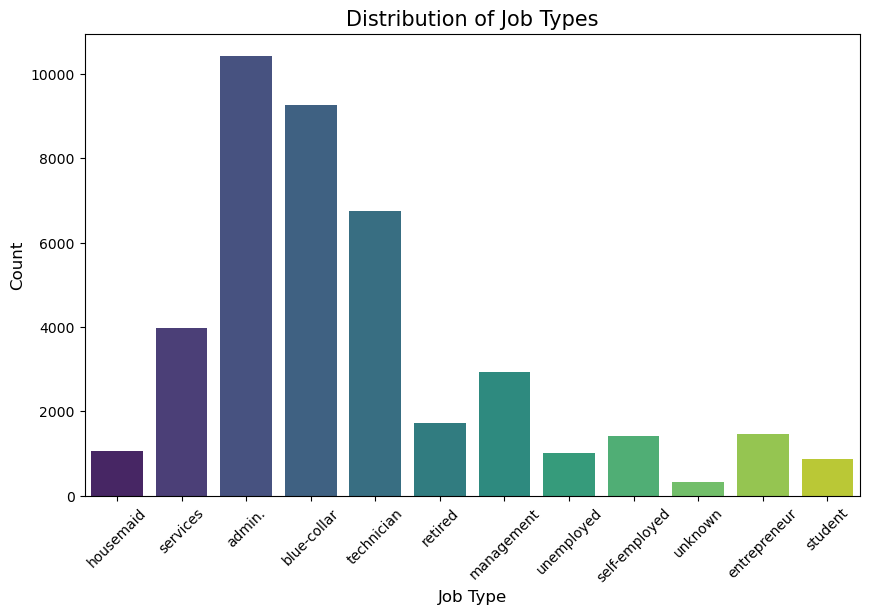

In [16]:
#Exploring categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='job', palette='viridis')
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Job Types', fontsize=15)
plt.xticks(rotation=45)
plt.show()

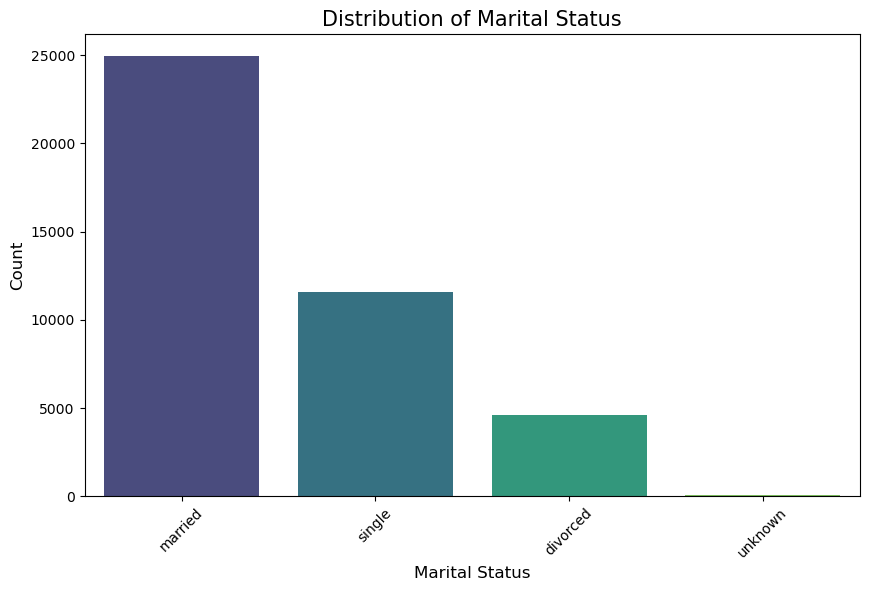

In [19]:
#Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='marital', palette='viridis')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Marital Status', fontsize=15)
plt.xticks(rotation=45)
plt.show()

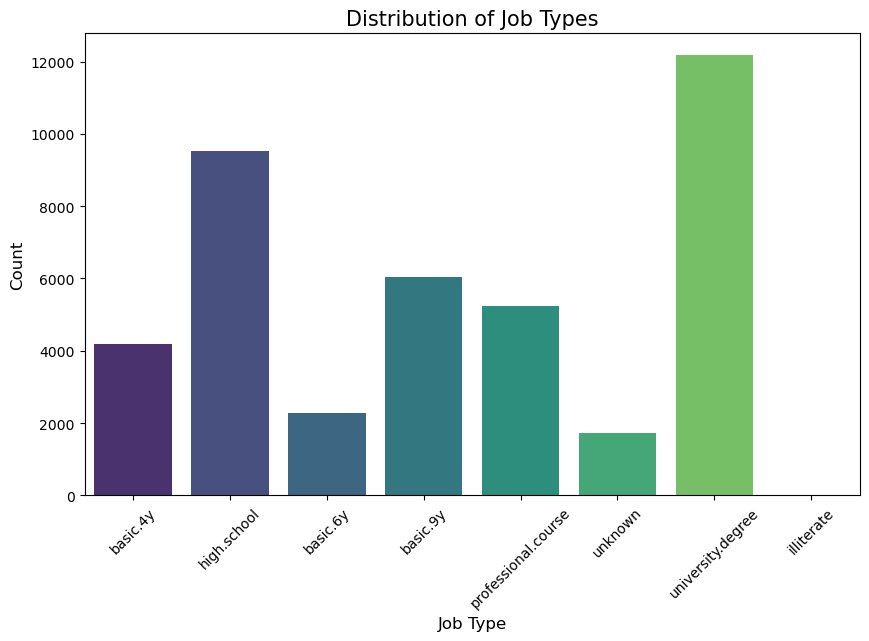

In [18]:
#education
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='education', palette='viridis')
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Education levels', fontsize=15)
plt.xticks(rotation=45)
plt.show()

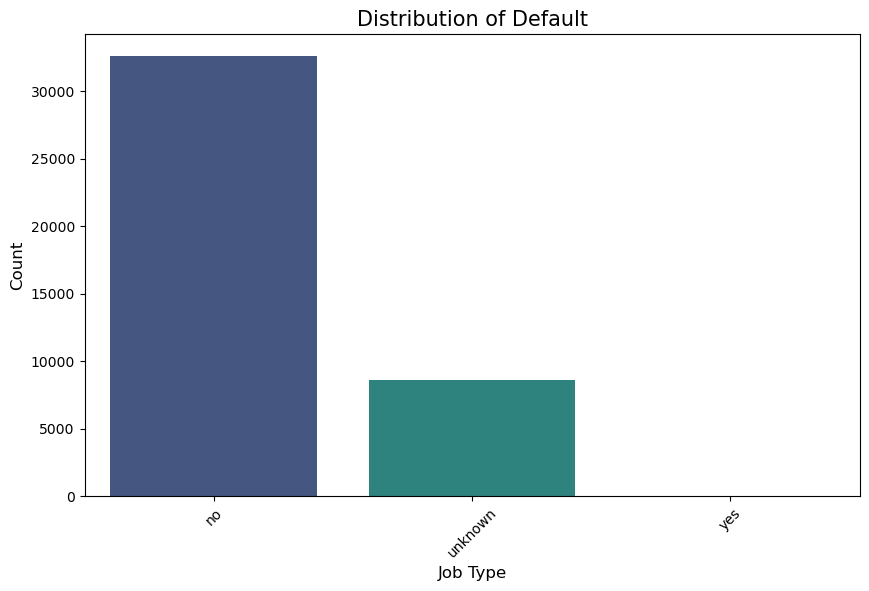

In [20]:
#default
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='default', palette='viridis')
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Default status', fontsize=15)
plt.xticks(rotation=45)
plt.show()

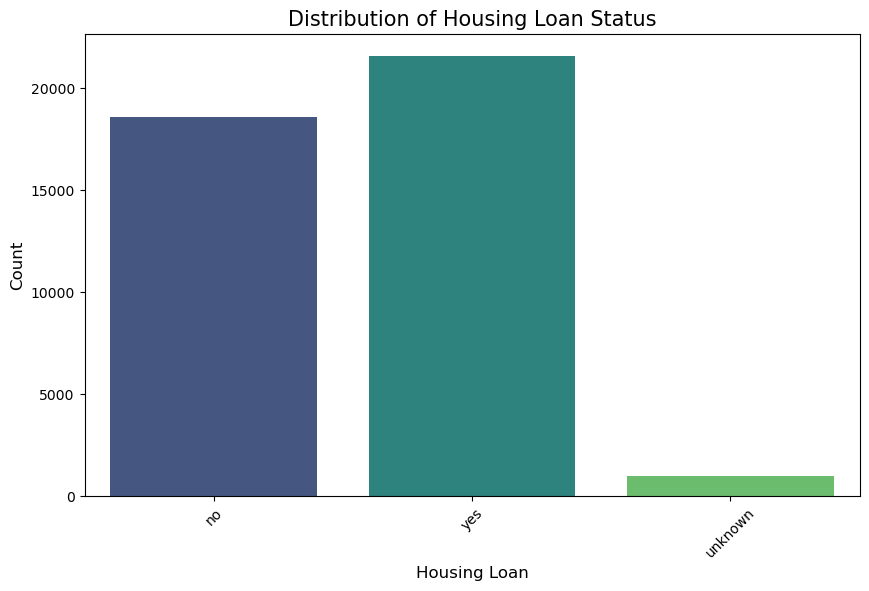

In [21]:
#Housing loan status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='housing', palette='viridis')
plt.xlabel('Housing Loan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Housing Loan Status', fontsize=15)
plt.xticks(rotation=45)
plt.show()

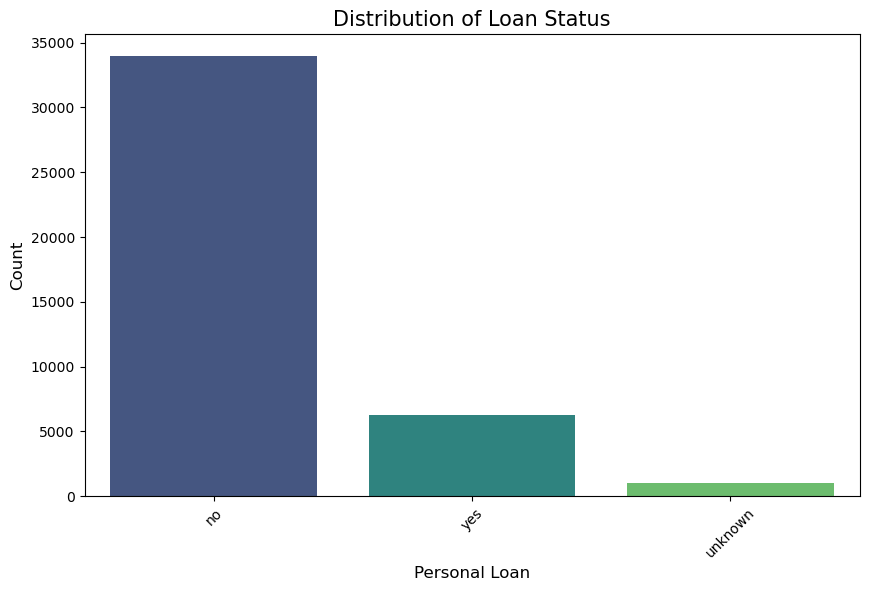

In [22]:
#Distribution of loan status
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='loan', palette='viridis')
plt.xlabel('Personal Loan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Loan Status', fontsize=15)
plt.xticks(rotation=45)
plt.show()

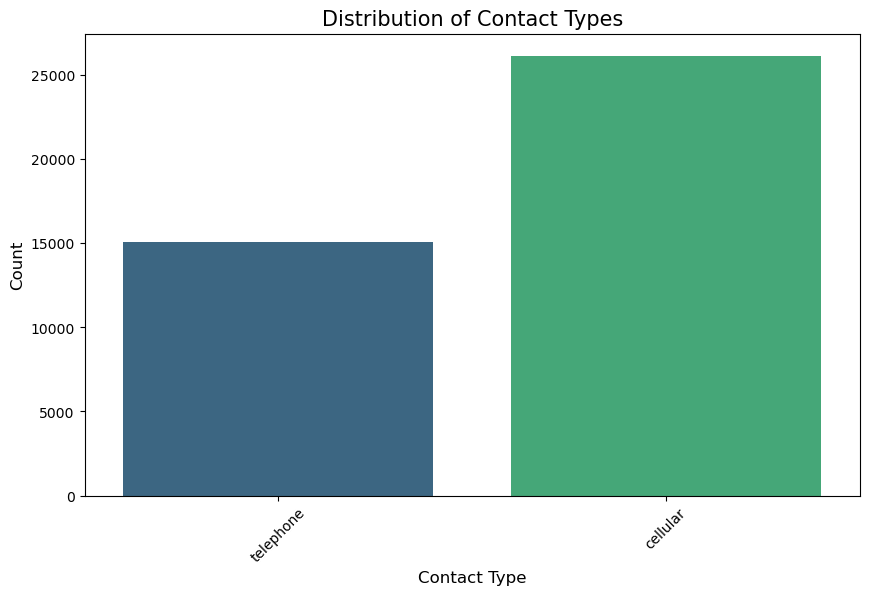

In [23]:
#Distribution of contact types
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='contact', palette='viridis')
plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Contact Types', fontsize=15)
plt.xticks(rotation=45)
plt.show()

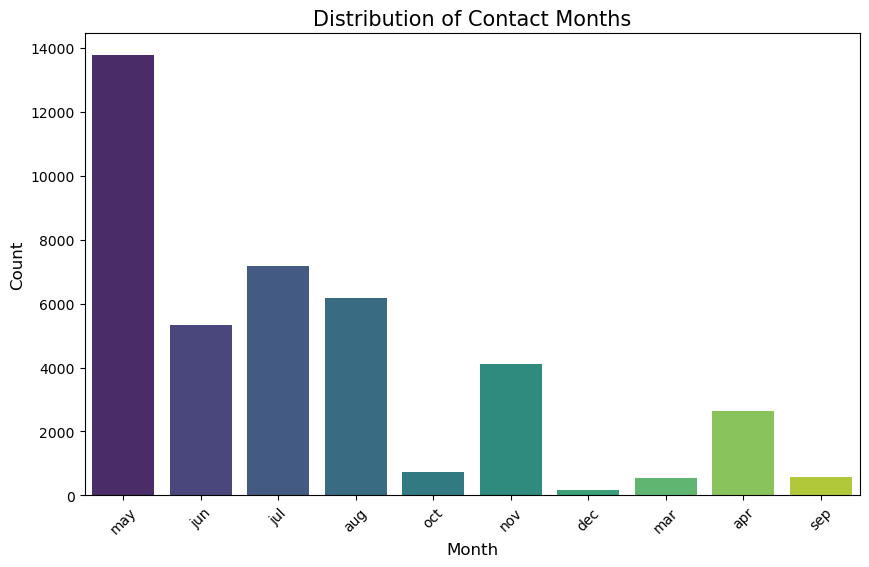

In [24]:
#Distribution of month contact
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='month', palette='viridis')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Contact Months', fontsize=15)
plt.xticks(rotation=45)
plt.show()

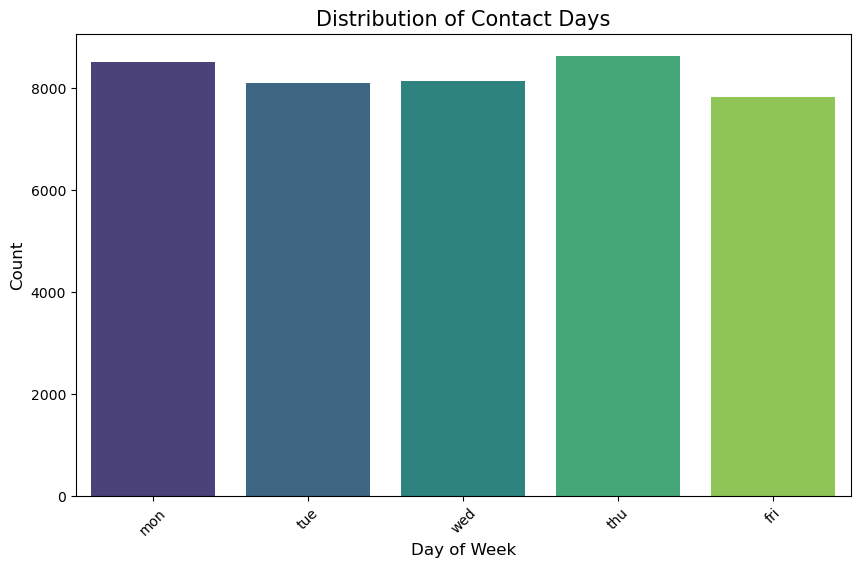

In [25]:
#Distribution of contact days
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='day_of_week', palette='viridis')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Contact Days', fontsize=15)
plt.xticks(rotation=45)
plt.show()

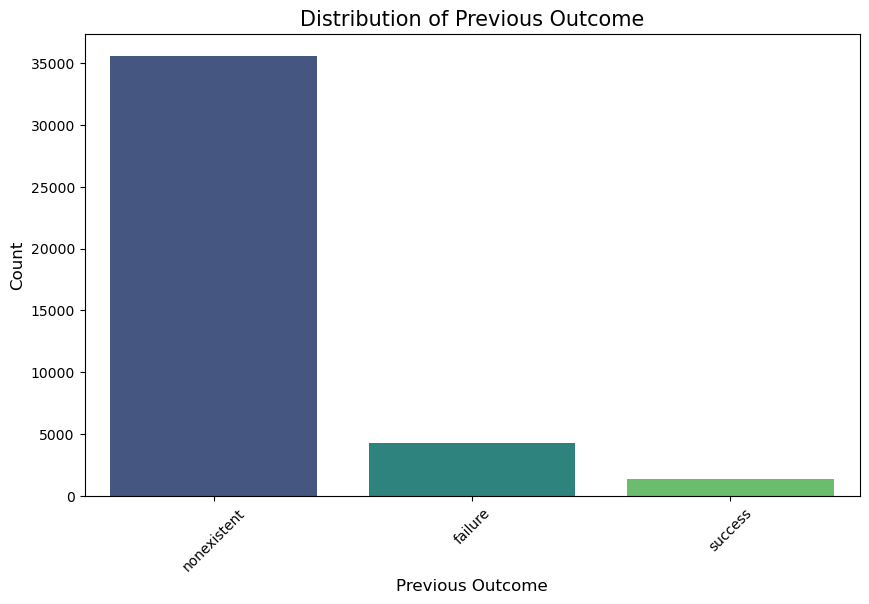

In [26]:
#Distribution of previous outcome
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='poutcome', palette='viridis')
plt.xlabel('Previous Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Previous Outcome', fontsize=15)
plt.xticks(rotation=45)
plt.show()

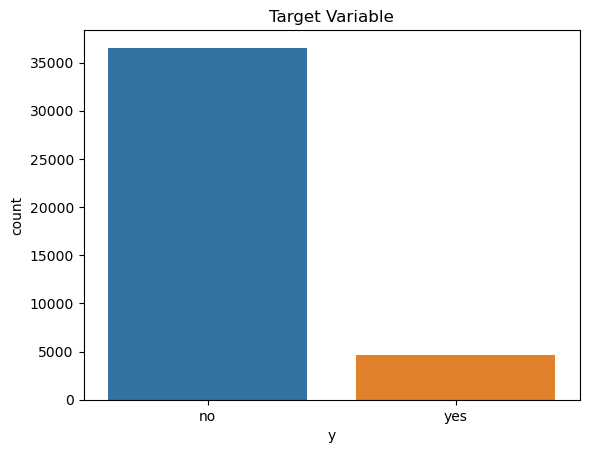

In [16]:
# Visualize distribution of target variable
sns.countplot(x='y', data=bank)
plt.title("Target Variable")
plt.show()

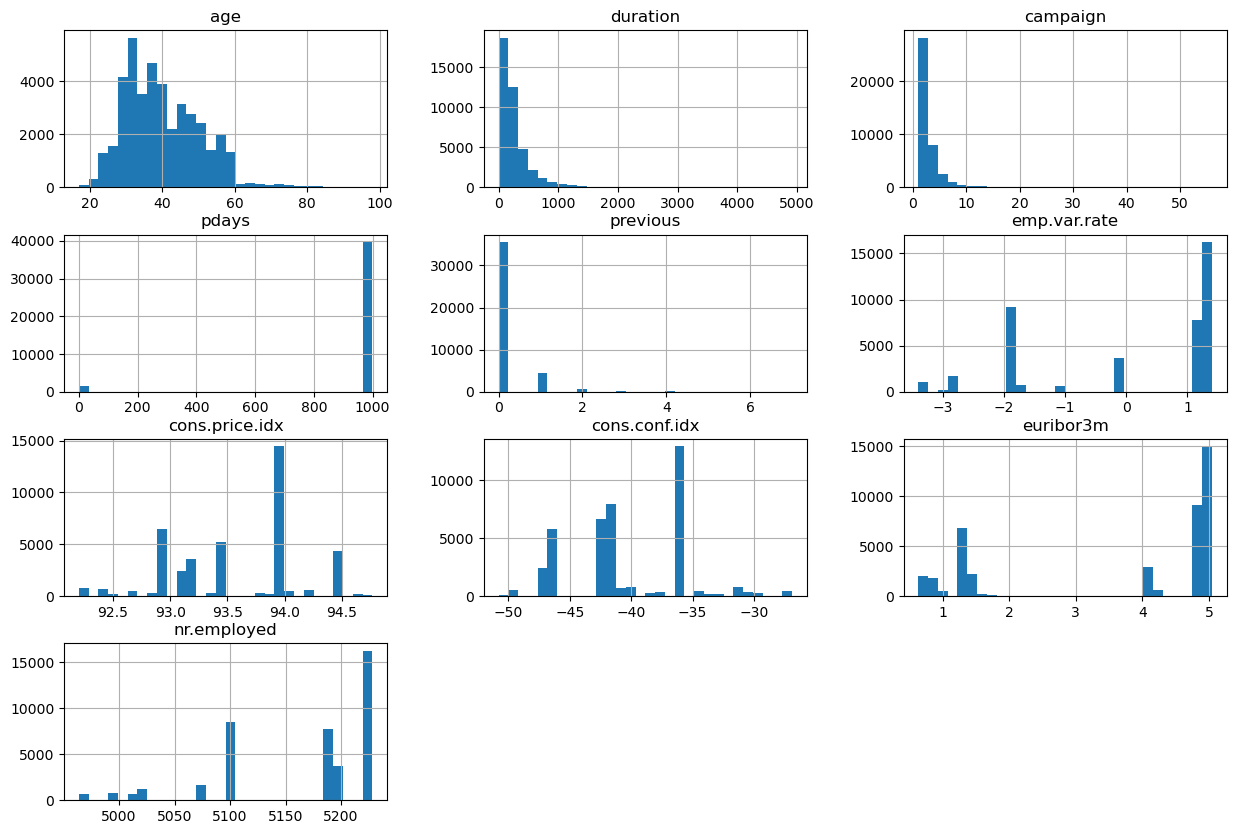

In [29]:
#Exploring numerical variables
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
bank[numerical_features].hist(bins=30, figsize=(15, 10))
plt.show()

In [5]:
#Identify categorical variables
#categorical_cols = ['job', 'marital','education','default', 'housing', 'loan','contact','month', 'day_of_week', 'poutcome','y']
# Perform one-hot encoding for categorical variables
categorical_cols = [col for col in bank.columns if col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']]
bank_encoded = pd.get_dummies(bank, columns=categorical_cols, drop_first=True)
#bank_encoded.info()
# Extract numerical columns
numerical_cols = [col for col in bank.columns if col not in categorical_cols and col != 'y']
scaler = StandardScaler()
bank_scaled = bank_encoded.copy()
bank_scaled[numerical_cols] = scaler.fit_transform(bank_encoded[numerical_cols])
# Check if there are any remaining categorical variables
remaining_categorical_cols = [col for col in bank.columns if col not in numerical_cols and col != 'y']
print("Remaining Categorical Columns:", remaining_categorical_cols)
bank_encoded.info()

Remaining Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar           

# DATA PREPROCESSING

In [83]:
#Missing Values
bank.isnull()

age  duration  campaign  pdays  previous  emp.var.rate  \
0      False     False     False  False     False         False   
1      False     False     False  False     False         False   
2      False     False     False  False     False         False   
3      False     False     False  False     False         False   
4      False     False     False  False     False         False   
...      ...       ...       ...    ...       ...           ...   
41183  False     False     False  False     False         False   
41184  False     False     False  False     False         False   
41185  False     False     False  False     False         False   
41186  False     False     False  False     False         False   
41187  False     False     False  False     False         False   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_nov  \
0               False          False      False        False  ...      False   
1               False          False      False        False  ...      False   
2               False          False      False        False  ...      False   
3               False          False      False        False  ...      False   
4               False          False      False        False  ...      False   
...               ...            ...        ...          ...  ...        ...   
41183           False          False      False        False  ...      False   
41184           False          False      False        False  ...      False   
41185           False          False      False        False  ...      False   
41186           False          False      False        False  ...      False   
41187           False          False      False        False  ...      False   

       month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0          False      False            False            False   
1          False      False            False            False   
2          False      False            False            False   
3          False      False            False            False   
4          False      False            False            False   
...          ...        ...              ...              ...   
41183      False      False            False            False   
41184      False      False            False            False   
41185      False      False            False            False   
41186      False      False            False            False   
41187      False      False            False            False   

       day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0                False            False                 False   
1                False            False                 False   
2                False            False                 False   
3                False            False                 False   
4                False            False                 False   
...                ...              ...                   ...   
41183            False            False                 False   
41184            False            False                 False   
41185            False            False                 False   
41186            False            False                 False   
41187            False            False                 False   

       poutcome_success  y_yes  
0                 False  False  
1                 False  False  
2                 False  False  
3                 False  False  
4                 False  False  
...                 ...    ...  
41183             False  False  
41184             False  False  
41185             False  False  
41186             False  False  
41187             False  False  

[41188 rows x 54 columns]

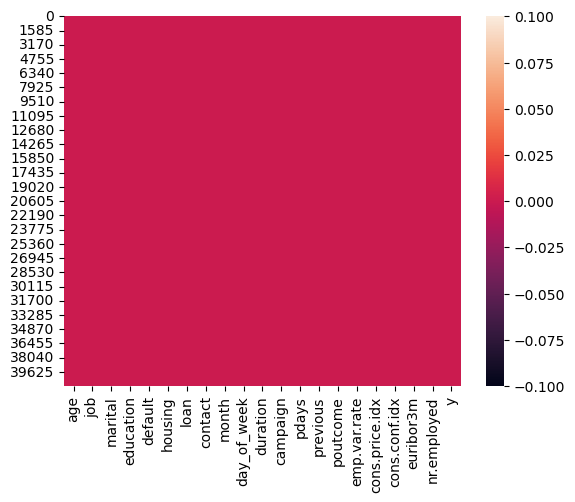

In [14]:
sns.heatmap(bank.isnull())
plt.show()

In [9]:
#Missing values count
bank.isnull().sum().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [10]:
#Drop duplicate values
bank.drop_duplicates()

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41176 rows x 21 columns]

In [11]:
#correlation matrix
corr_matrix = bank.corr()
corr_matrix

C:\Users\elmaf\AppData\Local\Temp\ipykernel_14304\303973148.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bank.corr()


age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
age               -0.017725  
duration          -0.044703  
campaign           0.144095  
pdays              0.372605  
previous          -0.501333  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000

C:\Users\elmaf\AppData\Local\Temp\ipykernel_14304\2246364141.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre_matrix = bank.corr()


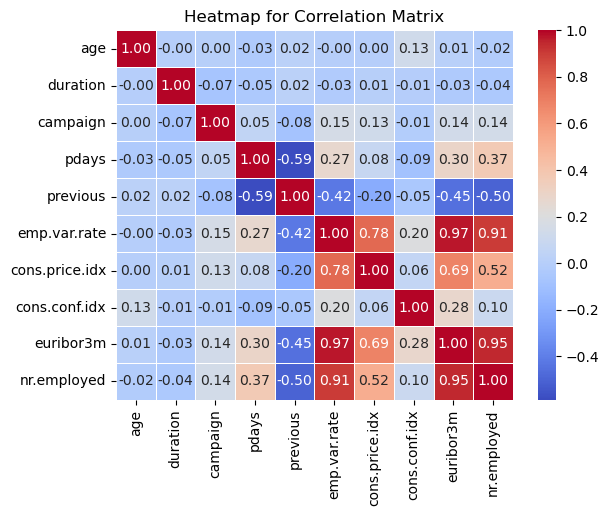

In [12]:
# Plotting Heatmap for better visualization
corre_matrix = bank.corr()
sns.heatmap(corre_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Heatmap for Correlation Matrix")
plt.show()

From the correlation matrix the following observations are made
nr.employed and euribor3m are highly correlated
emp.var.rate and nr.employed are highly correlated
emp.var.rate and euribor3m are highly correlated


# MODEL TRAINING

In [6]:
# Apply label encoding to categorical columns 
le = LabelEncoder()
bank['y'] = le.fit_transform(bank['y'])
bank.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  y  
41183       4963.6  1  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  
41187       4963.6  0  

[5 rows x 21 columns]

In [7]:
# Split data into features and target
X =  bank_encoded.drop( 'y_yes', axis = 1) #Data feeding into the models
Y =  bank_encoded['y_yes']

# Split data into training and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)


Model Training

In [8]:

#Data Scaling
# Normalize the data
#scaler = StandardScaler()
#bank_encoded[numerical_cols] = scaler.fit_transform(bank_encoded[numerical_cols])
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scaler = StandardScaler()
bank_scaled = bank_encoded.copy()
bank_scaled[numerical_cols] = scaler.fit_transform(bank_encoded[numerical_cols])

In [9]:
#Training the model
#initalise the model
model = LogisticRegression()

#train the model
model.fit(X_train, Y_train)



LogisticRegression()

Hyperparameter Tuning

In [11]:
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, Y_train)
best_model = grid.best_estimator_

C:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\elmaf\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [12]:
# Predictions
y_pred = best_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [127]:
#Checking for accuracy
accuracy= accuracy_score(y_pred,Y_test)
accuracy

0.9149065307113377

The model is 91% accurate

[[7114  205]
 [ 496  423]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7319
           1       0.67      0.46      0.55       919

    accuracy                           0.91      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.91      0.91      0.91      8238



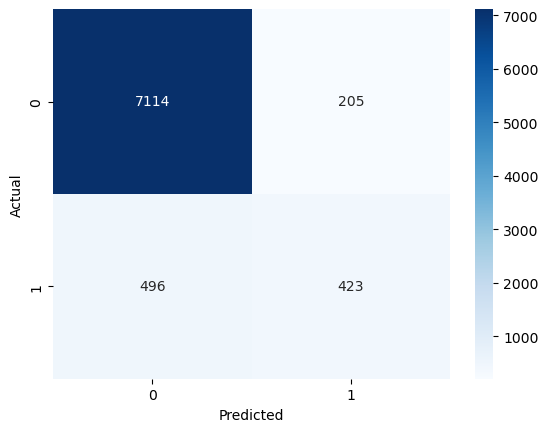

In [14]:
# Evaluation metrics
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Explanation:
True Positives (TP): Correctly predicted positive cases. True Negatives (TN): Correctly predicted
negative cases. False Positives (FP): Incorrectly predicted positive cases. False Negatives (FN):
Incorrectly predicted negative cases.


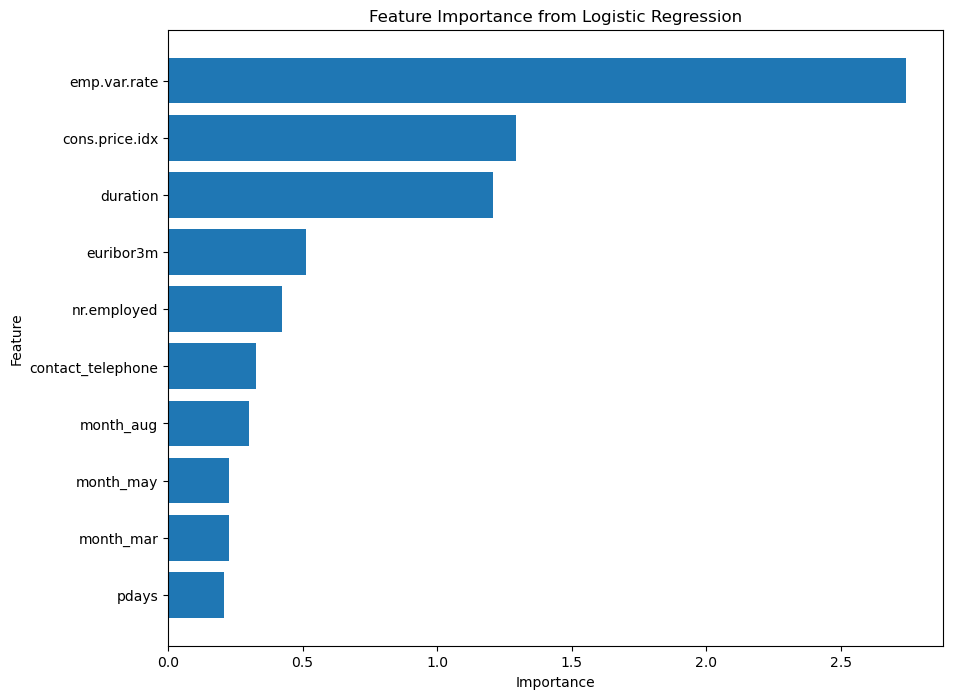

In [32]:
importance = np.abs(model.coef_[0])

#Create a DataFrame for features and their importances
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(10)
#Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.show()

The bar plot shows the importance of each feature in making predictions. Higher importance
indicates a greater influence on the model’s predictions.

# Conclusion

#### Summary
This project successfully predicted customer subscription to term deposits using various features and logistic regression. The model achieved a satisfactory accuracy and highlighted key factors influencing customer decisions.

#### Future Work
Future enhancements could include:
- Exploring more complex models like Random Forests or Gradient Boosting.
- Performing feature engineering to create new relevant features.
- Collecting more data to improve model robustness.